# Основные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Линейная регрессия

In [2]:
from sklearn import linear_model


In [5]:
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/linear_regression_df.csv"
df = pd.read_csv(url)

In [7]:
df.columns = ['X', 'Y']

In [8]:
df.head()

X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4

In [9]:
sns.set_context("notebook", font_scale = 1.1)

In [10]:
sns.set_style("ticks")

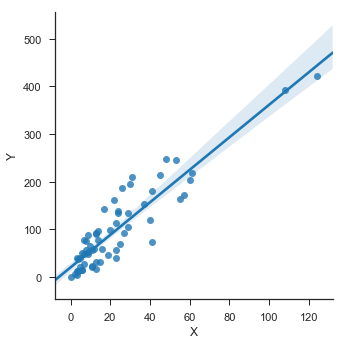

In [11]:
sns.lmplot('X', 'Y', data=df)

Text(0,0.5,'Response')

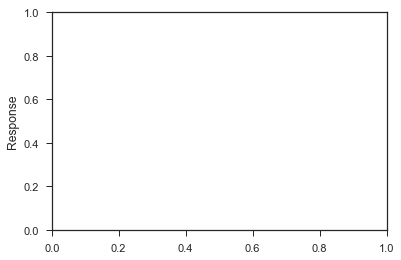

In [12]:
plt.ylabel('Response')

Text(0.5,0,'Explanatory')

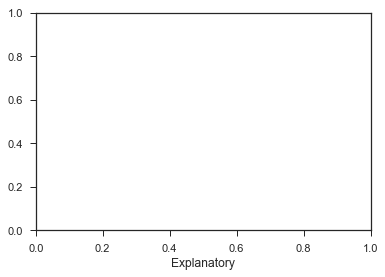

In [13]:
plt.xlabel('Explanatory')

In [14]:
linear = linear_model.LinearRegression()

In [15]:
trainX = np.asarray(df.X[20:len(df.X)]).reshape(-1,1)

In [16]:
trainY = np.asarray(df.Y[20:len(df.Y)]).reshape(-1, 1)

In [17]:
testX = np.asarray(df.X[:20]).reshape(-1, 1)
testY = np.asarray(df.Y[:20]).reshape(-1, 1)

In [18]:
linear.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
linear.score(trainX, trainY)

0.7036549053548855

In [20]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R² Value: \n', linear.score(trainX, trainY))

Coefficient: 
 [[3.43948437]]
Intercept: 
 [24.00493255]
R² Value: 
 0.7036549053548855


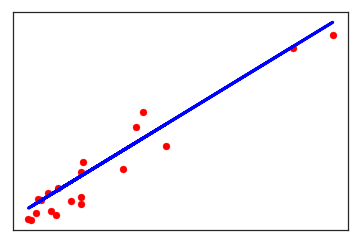

103.1130730122212

In [41]:
predicted = linear.predict(testX)
plt.scatter(testX, testY, color="red")
plt.plot(testX, predicted, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
tested = linear.predict(23)

# Логистическая регрессия

In [42]:
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/logistic_regression_df.csv"
df = pd.read_csv(url)
df.columns = ['X', 'Y']
df.head()

X  Y
0  26.6  0
1  23.3  1
2  28.1  0
3  43.1  1
4  25.6  0

Text(0.5,0,'Explanatory')

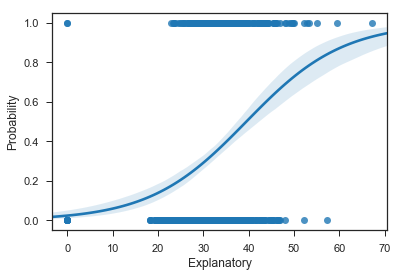

In [43]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.regplot('X','Y', data=df, logistic=True)
plt.ylabel('Probability')
plt.xlabel('Explanatory')

In [44]:
logistic = LogisticRegression()
X = (np.asarray(df.X)).reshape(-1, 1)
Y = (np.asarray(df.Y)).ravel()
logistic.fit(X, Y)
logistic.score(X, Y)
print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)
print('R² Value: \n', logistic.score(X, Y))

Coefficient: 
 [[0.07861888]]
Intercept: 
 [-3.17496229]
R² Value: 
 0.6701434159061278


# Деревья решений

In [46]:
from sklearn import tree
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

X1   X2   X3   X4            Y
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

In [47]:
from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion='gini')
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
decision.fit(trainX, trainY)
print('Accuracy: \n', decision.score(testX, testY))

Accuracy: 
 0.9333333333333333


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


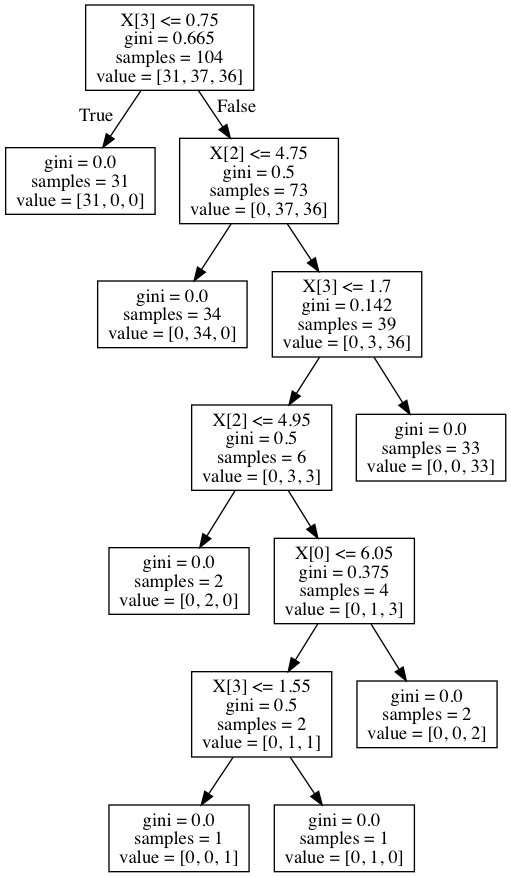

In [50]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot
dot_data = StringIO()
tree.export_graphviz(decision, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Метод опорных векторов

In [51]:
from sklearn import svm
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X4', 'X3', 'X1', 'X2', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

X1   X2            Y
0  1.4  0.2  Iris-setosa
1  1.3  0.2  Iris-setosa
2  1.5  0.2  Iris-setosa
3  1.4  0.2  Iris-setosa
4  1.7  0.4  Iris-setosa

In [52]:
from sklearn.cross_validation import train_test_split
support = svm.SVC()
X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
support.fit(trainX, trainY)
print('Accuracy: \n', support.score(testX, testY))
pred = support.predict(testX)

Accuracy: 
 0.9555555555555556


Text(0.5,26.256,'X1')

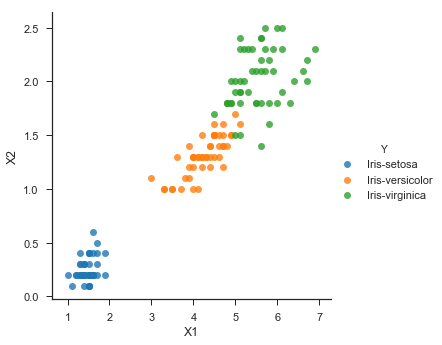

In [53]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

# Метод k-ближайших соседей

In [54]:
from sklearn.neighbors import KNeighborsClassifier
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

X1   X2            Y
0  4.9  3.0  Iris-setosa
1  4.7  3.2  Iris-setosa
2  4.6  3.1  Iris-setosa
3  5.0  3.6  Iris-setosa
4  5.4  3.9  Iris-setosa

Text(0.5,26.256,'X1')

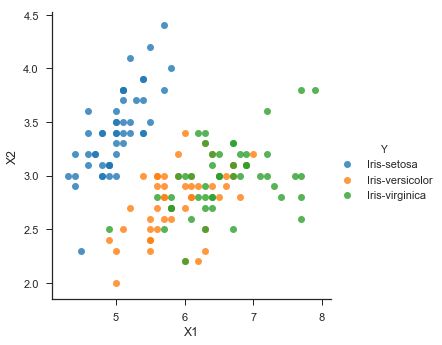

In [55]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

In [56]:
from sklearn.cross_validation import train_test_split
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
neighbors.fit(trainX, trainY)
print('Accuracy: \n', neighbors.score(testX, testY))
pred = neighbors.predict(testX)

Accuracy: 
 0.7555555555555555


# Случайный лес

In [57]:
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

X1   X2   X3   X4            Y
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

In [58]:
from sklearn.cross_validation import train_test_split
forest = RandomForestClassifier()
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)

Accuracy: 
 0.9777777777777777


# Метод k-средних

In [65]:
from sklearn.cluster import KMeans
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

X1   X2            Y
0  4.9  3.0  Iris-setosa
1  4.7  3.2  Iris-setosa
2  4.6  3.1  Iris-setosa
3  5.0  3.6  Iris-setosa
4  5.4  3.9  Iris-setosa

In [66]:
from sklearn.cross_validation import train_test_split
kmeans = KMeans(n_clusters=3)
X = df.values[:, 0:2]
kmeans.fit(X)
df['Pred'] = kmeans.predict(X)
df.head()

X1   X2            Y  Pred
0  4.9  3.0  Iris-setosa     1
1  4.7  3.2  Iris-setosa     1
2  4.6  3.1  Iris-setosa     1
3  5.0  3.6  Iris-setosa     1
4  5.4  3.9  Iris-setosa     1

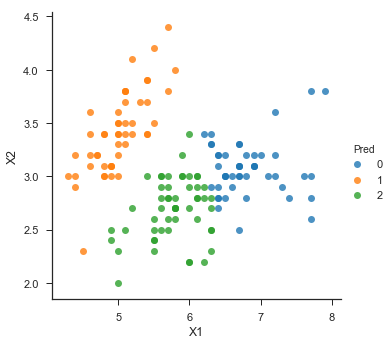

In [67]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue = 'Pred')

# Метод главных компонент

In [68]:
from sklearn import decomposition
url = "https://raw.githubusercontent.com/conordewey3/Hitchhikers-Guide-Machine-Learning/master/iris_df.csv"
df = pd.read_csv(url)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

X1   X2   X3   X4            Y
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

In [69]:
from sklearn import decomposition
pca = decomposition.PCA()
fa = decomposition.FactorAnalysis()
X = df.values[:, 0:4]
Y = df.values[:, 4]
train, test = train_test_split(X,test_size = 0.3)
train_reduced = pca.fit_transform(train)
test_reduced = pca.transform(test)
pca.n_components_

4